In [ ]:
% pip install missingno

In [4]:
import missingno as msno
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('../data/raw//train.csv')
df.head()

,company_id,payment_note_date,payment_note_amount,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4,revenue,revenue-1,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
0,1,2014/06/12,6487.0,Aug-18,Aug-17,Aug-16,Aug-15,Aug-14,5677,8673.0,...,13.6,10.3,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA
1,2,NaN,0.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,10617,8266.0,...,9.1,15.9,23.1,16.8,229.0,280.7,296.1,234.0,213.0,AA
2,3,NaN,NaN,Dec-17,NaN,NaN,NaN,NaN,7201,NaN,...,NaN,NaN,NaN,NaN,128.1,NaN,NaN,NaN,NaN,AA
3,4,NaN,NaN,Apr-18,Apr-17,Apr-16,Apr-15,Apr-14,22629,20668.0,...,0.2,2.9,0.1,1.9,97.8,89.2,82.2,72.4,92.9,A
4,5,2015/05/03,85539.0,Jul-18,Jul-17,Jul-16,Jul-15,Jul-14,10221,8358.0,...,14.6,-0.4,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA


In [8]:
for i in range(3, 8):
    df.iloc[:, i] = pd.to_datetime(df.iloc[:, i], format="%b-%y")

In [9]:
df['years_data'] = df.iloc[:, 3:8].max(axis=1).dt.year + 1 - df.iloc[:, 3:8].min(axis=1).dt.year
df['has_payment_note'] = np.where(df.payment_note_date.notnull(), 1, 0)
df.head()

,company_id,payment_note_date,payment_note_amount,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4,revenue,revenue-1,...,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating,years_data,has_payment_note
0,1,2014/06/12,6487.0,2018-08-01,2017-08-01,2016-08-01,2015-08-01,2014-08-01,5677,8673.0,...,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA,5,1
1,2,NaN,0.0,2017-12-01,2016-12-01,2015-12-01,2014-12-01,2013-12-01,10617,8266.0,...,23.1,16.8,229.0,280.7,296.1,234.0,213.0,AA,5,0
2,3,NaN,NaN,2017-12-01,NaT,NaT,NaT,NaT,7201,NaN,...,NaN,NaN,128.1,NaN,NaN,NaN,NaN,AA,1,0
3,4,NaN,NaN,2018-04-01,2017-04-01,2016-04-01,2015-04-01,2014-04-01,22629,20668.0,...,0.1,1.9,97.8,89.2,82.2,72.4,92.9,A,5,0
4,5,2015/05/03,85539.0,2018-07-01,2017-07-01,2016-07-01,2015-07-01,2014-07-01,10221,8358.0,...,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA,5,1


In [10]:
df.drop(columns=['payment_note_date', 'financials_date', 'financials_date-1', 'financials_date-2', 'financials_date-3', 'financials_date-4'], inplace=True)

In [11]:
col = df.pop('has_payment_note')
df.insert(1, 'has_payment_note', col)

In [12]:
col = df.pop('years_data')
df.insert(3, 'years_data', col)

In [13]:
df.head()

,company_id,has_payment_note,payment_note_amount,years_data,revenue,revenue-1,revenue-2,revenue-3,revenue-4,net_sales,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
0,1,1,6487.0,5,5677,8673.0,8532.0,7825.0,5385.0,5677,...,13.6,10.3,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA
1,2,0,0.0,5,10617,8266.0,9713.0,9428.0,7394.0,10506,...,9.1,15.9,23.1,16.8,229.0,280.7,296.1,234.0,213.0,AA
2,3,0,NaN,1,7201,NaN,NaN,NaN,NaN,7201,...,NaN,NaN,NaN,NaN,128.1,NaN,NaN,NaN,NaN,AA
3,4,0,NaN,5,22629,20668.0,24591.0,23754.0,23656.0,22619,...,0.2,2.9,0.1,1.9,97.8,89.2,82.2,72.4,92.9,A
4,5,1,85539.0,5,10221,8358.0,5865.0,4038.0,5128.0,10216,...,14.6,-0.4,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA


In [14]:
df[['company_id', 'Rating']].groupby('Rating').count()

,company_id
Rating,
A,2114
AA,4623
AAA,2784
B,888
C,555


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10964 entries, 0 to 10963
Data columns (total 55 columns):
company_id                            10964 non-null int64
has_payment_note                      10964 non-null int64
payment_note_amount                   3814 non-null float64
years_data                            10964 non-null int64
revenue                               10964 non-null int64
revenue-1                             10709 non-null float64
revenue-2                             10186 non-null float64
revenue-3                             9613 non-null float64
revenue-4                             9006 non-null float64
net_sales                             10964 non-null int64
net_sales-1                           10709 non-null float64
net_sales-2                           10186 non-null float64
net_sales-3                           9613 non-null float64
net_sales-4                           9006 non-null float64
profit_after_net_financial_items      10964 non-null

In [16]:
df.isna().sum()

company_id                               0
has_payment_note                         0
payment_note_amount                   7150
years_data                               0
revenue                                  0
revenue-1                              255
revenue-2                              778
revenue-3                             1351
revenue-4                             1958
net_sales                                0
net_sales-1                            255
net_sales-2                            778
net_sales-3                           1351
net_sales-4                           1958
profit_after_net_financial_items         0
profit_after_net_financial_items-1     255
profit_after_net_financial_items-2     778
profit_after_net_financial_items-3    1351
profit_after_net_financial_items-4    1958
profit                                   0
profit-1                               255
profit-2                               778
profit-3                              1351
profit-4   

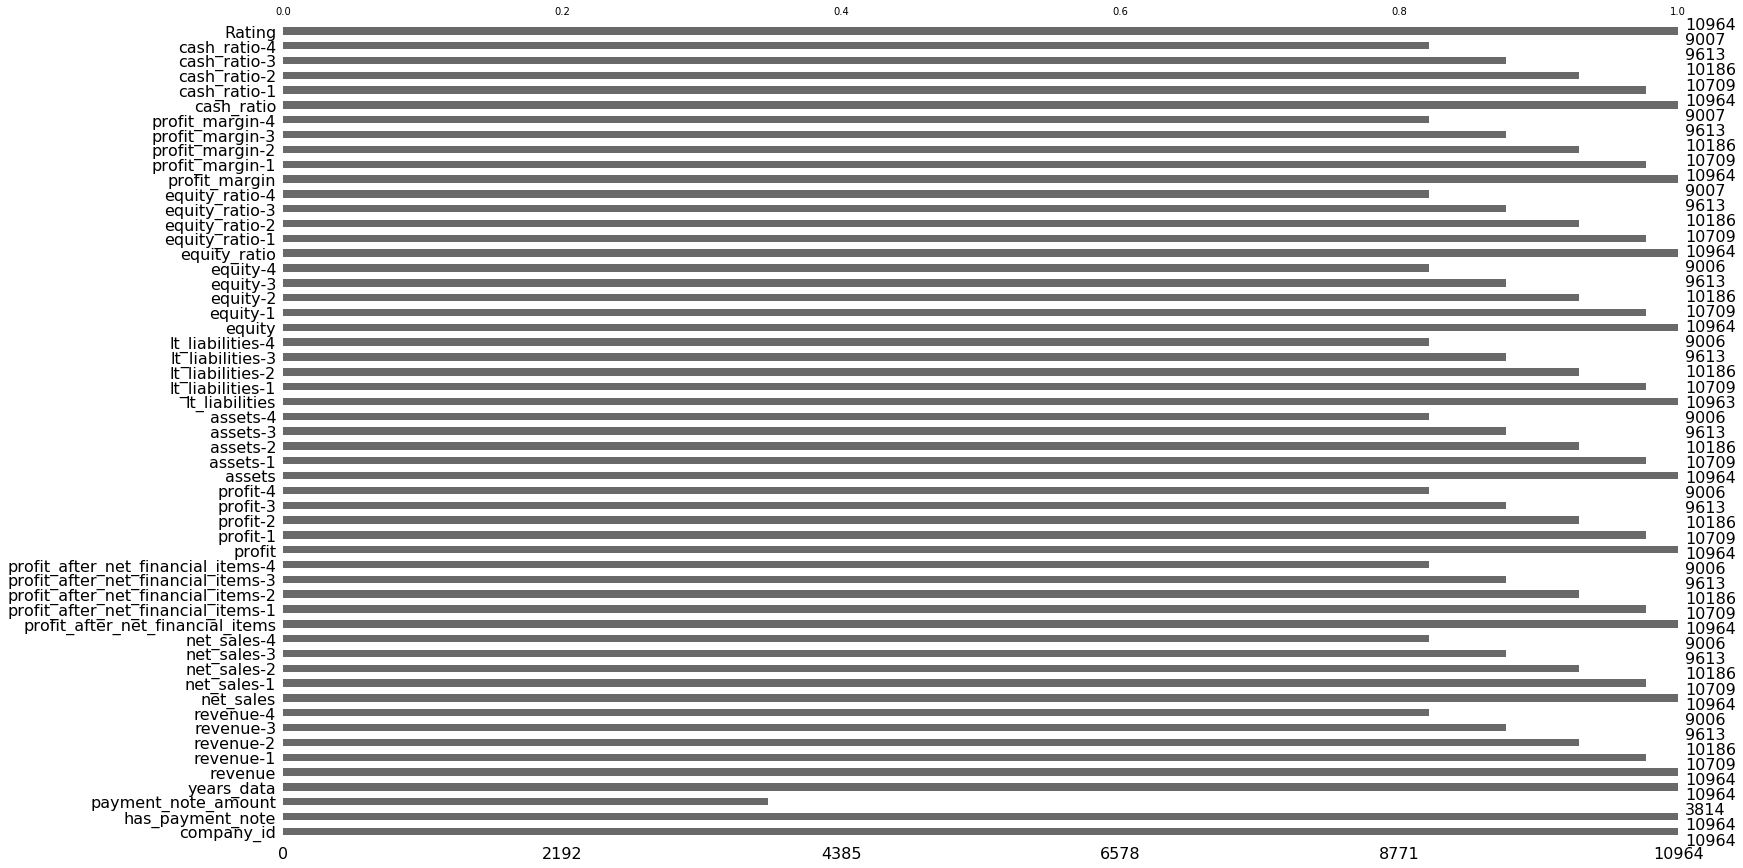

In [17]:
msno.bar(df)

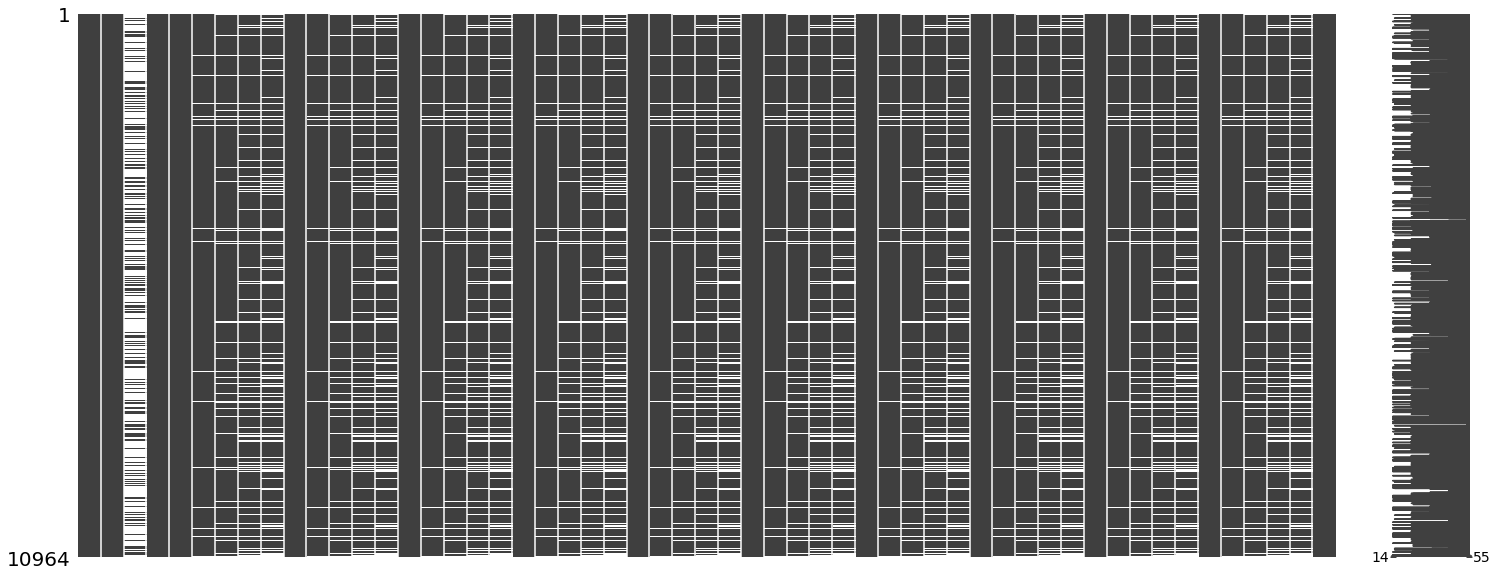

In [18]:
msno.matrix(df)

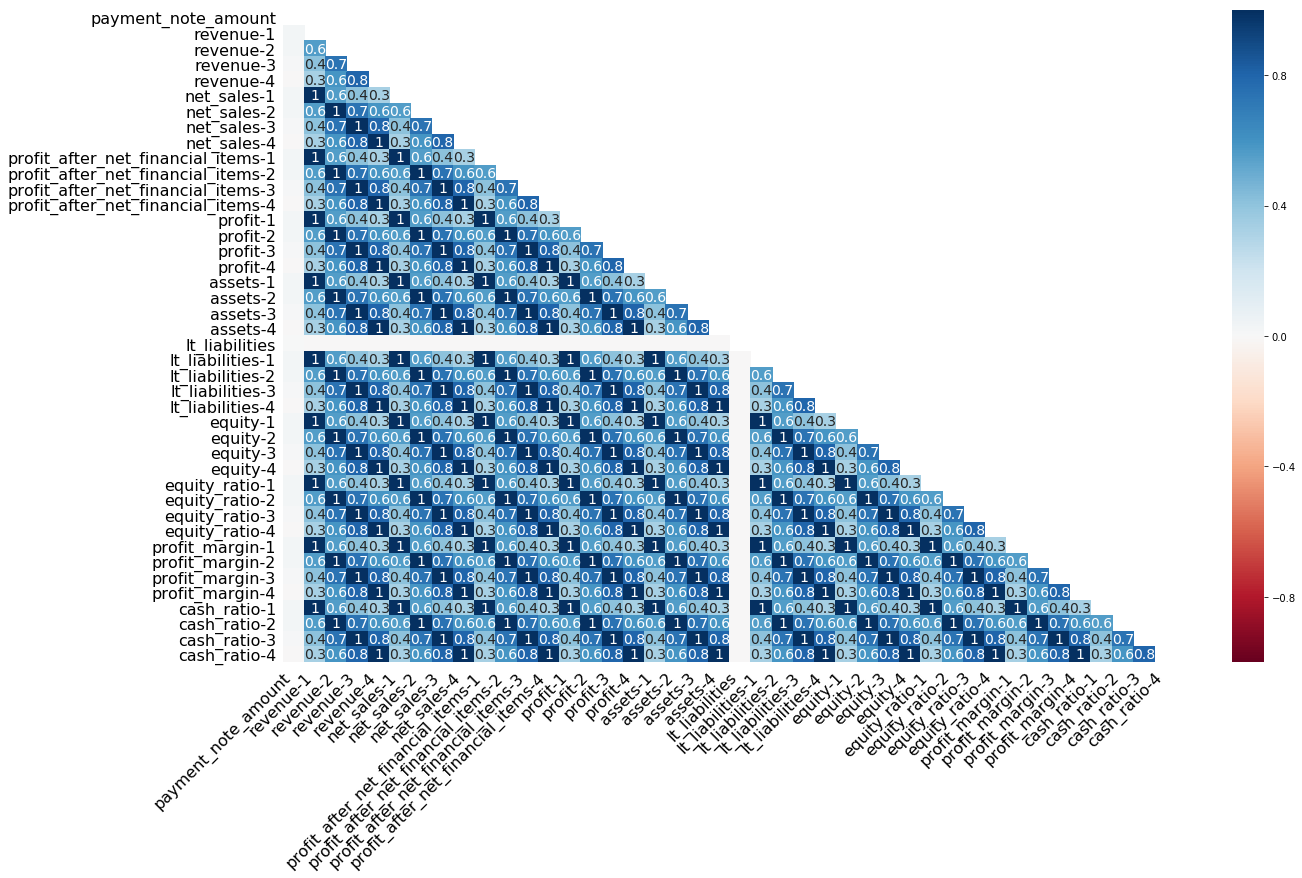

In [19]:
msno.heatmap(df)

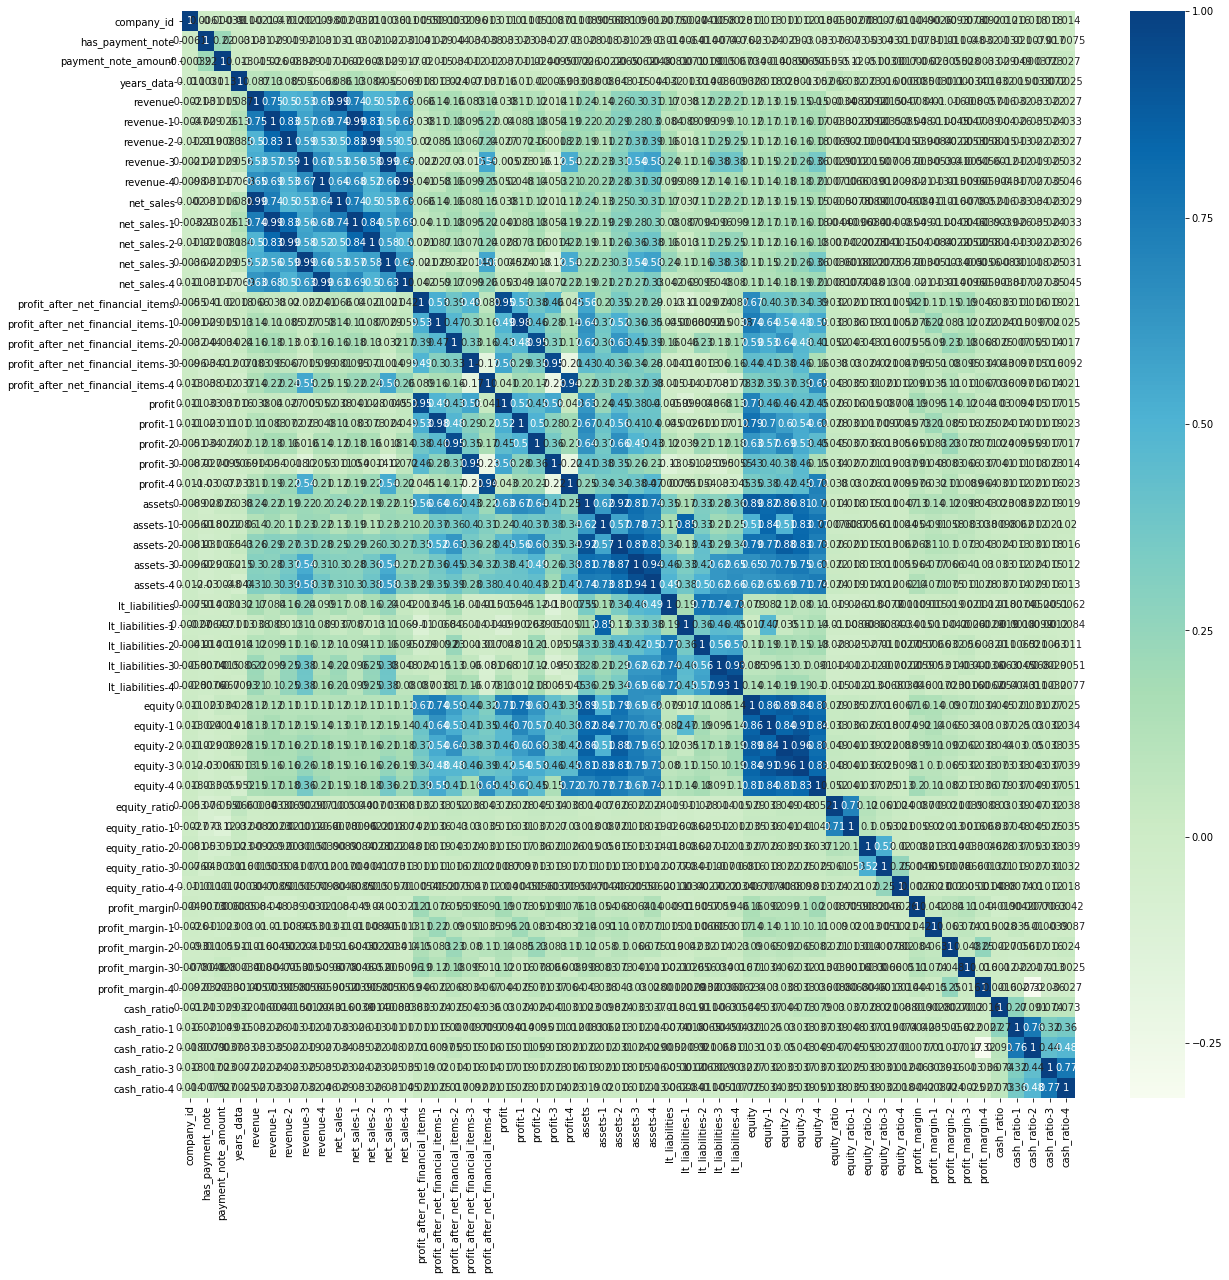

In [20]:
plt.figure(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation, cmap="GnBu", annot=True)

In [21]:
df_clean = df.fillna(0)
df_clean.head()

,company_id,has_payment_note,payment_note_amount,years_data,revenue,revenue-1,revenue-2,revenue-3,revenue-4,net_sales,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
0,1,1,6487.0,5,5677,8673.0,8532.0,7825.0,5385.0,5677,...,13.6,10.3,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA
1,2,0,0.0,5,10617,8266.0,9713.0,9428.0,7394.0,10506,...,9.1,15.9,23.1,16.8,229.0,280.7,296.1,234.0,213.0,AA
2,3,0,0.0,1,7201,0.0,0.0,0.0,0.0,7201,...,0.0,0.0,0.0,0.0,128.1,0.0,0.0,0.0,0.0,AA
3,4,0,0.0,5,22629,20668.0,24591.0,23754.0,23656.0,22619,...,0.2,2.9,0.1,1.9,97.8,89.2,82.2,72.4,92.9,A
4,5,1,85539.0,5,10221,8358.0,5865.0,4038.0,5128.0,10216,...,14.6,-0.4,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA
